# Iterating on Previous Naive Bayes Spam Classifier

Building a Naive Bayes calssifier for detecting spam SMS messages using this [UC Irvine dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

This exercise is an addition to the previous spam classifier that was built. New model iterations are at the bottom of the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
# Grab data
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter='\t', header=None)
sms_raw.columns = ['spam', 'message']

In [3]:
sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Basic feature engineering using potential spam keywords

keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Adding spaces around each word to eliminate pattern matching insine
    # other words.
    sms_raw[str(key)] = sms_raw['message'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
# Feature for detecting all caps messages.

sms_raw['allcaps'] = sms_raw['message'].str.isupper()

In [6]:
# Turning spam column into a boolean

sms_raw['spam'] = (sms_raw['spam'] == 'spam')

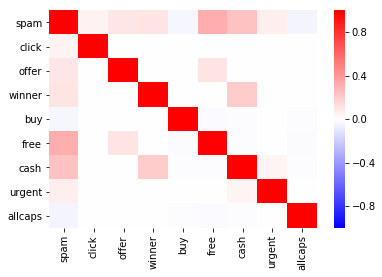

In [7]:
sns.heatmap(sms_raw.corr(), center=0, cmap='bwr', vmax=1, vmin=-1)

Using heatmap to check the independence of the variables. Most words look to be independent from each other, except for free:offer and cash:winner.  Going to keep everything in the model right now.

In [8]:
# Building out the training data
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [9]:
# The data is binary, so importing the Bernoulli version
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model
bnb = BernoulliNB()

# Fit the model to the data
bnb.fit(data, target)

# Classifying and storing the result
y_pred = bnb.predict(data)

print("Number of mislabeled points out of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of 5572 points: 604


## Messing around with additional feature engineering to improve the model performance.

In [10]:
spam_messages = sms_raw.loc[sms_raw['spam'] == True]

In [11]:
# Setting pandas display option to show full length fields
pd.set_option('display.max_colwidth', -1)

In [12]:
spam_messages['message'].sample(20)

4060    Moby Pub Quiz.Win a £100 High Street prize if u know who the new Duchess of Cornwall will be? Txt her first name to 82277.unsub STOP £1.50 008704050406 SP                     
3942    Free Msg: get Gnarls Barkleys "Crazy" ringtone TOTALLY FREE just reply GO to this message right now!                                                                           
4759    URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm                                
1691    Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone                                                  
2367    Tone Club: Your subs has now expired 2 re-sub reply MONOC 4 monos or POLYC 4 polys 1 weekly @ 150p per week Txt STOP 2 stop This msg free Stream 0871212025016                 
1741    UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operato

In [13]:
# Adding additional keywords

sms_raw['call'] = sms_raw['message'].str.contains(
    ' ' + 'call' + ' ', 
    case=False
)

sms_raw['sex'] = sms_raw['message'].str.contains(
    ' ' + 'sex' + ' ', 
    case=False
)

sms_raw['.co'] = sms_raw['message'].str.contains(
    ' ' + '.co' + ' ', 
    case=False
)


sms_raw['£'] = sms_raw['message'].str.contains(
    ' ' + '£' + ' ', 
    case=False
)

sms_raw['congrats!'] = sms_raw['message'].str.contains(
    ' ' + 'congrats!' + ' ', 
    case=False
)

sms_raw['urgent!'] = sms_raw['message'].str.contains(
    ' ' + 'urgent!' + ' ', 
    case=False
)

In [14]:
# Testing model with the new keywords
data_2 = sms_raw.iloc[:, 2:]
target_2 = sms_raw['spam']

bnb_2 = BernoulliNB()

bnb_2.fit(data_2, target_2)

y_pred_2 = bnb_2.predict(data_2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred_2).sum()
))

model1_misclass = (target != y_pred).sum()
model2_misclass = (target_2 != y_pred_2).sum()

print("Model 2 performed better by {} samples".format(
    (model1_misclass-model2_misclass)
))

Number of mislabeled points out of a total 5572 points : 558
Model 2 performed better by 46 samples


# Start of new model iterations

Will begin by visualizing the confusion matrix for the previous two Bernoulli model runs.

In [31]:
def precision(p,t):
    true_positive = ((p == True) & (t == True)).sum()
    true_negative = ((p == False) & (t == False)).sum()
    false_positive = ((p == True) & (t == False)).sum()
    false_negative = ((p == False) & (t == True)).sum()
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    return precision, recall

In [32]:
from sklearn.metrics import confusion_matrix

print('Initial model:\n', confusion_matrix(target, y_pred), '\n')
print('Model 1 precision: {} \nModel 1 recall: {}\n\n'.format(
    precision(y_pred, target)[0], precision(y_pred, target)[1]))

print('Second model with additional spam keywords:\n', confusion_matrix(target_2, y_pred_2), '\n')
print('Model 2 precision: {} \nModel 2 recall: {}\n\n'.format(
    precision(y_pred_2, target_2)[0], precision(y_pred_2, target_2)[1]))

Initial model:
 [[4770   55]
 [ 549  198]] 

Model 1 precision: 0.782608695652174 
Model 1 recall: 0.26506024096385544


Second model with additional spam keywords:
 [[4595  230]
 [ 328  419]] 

Model 2 precision: 0.6456086286594761 
Model 2 recall: 0.5609103078982597




The second model correctly identified far more spam messages than Model 1, however, it also misidentified more real messages as spam.

In [33]:
# Running the models through cross validation

from sklearn.model_selection import cross_val_score
print('Model 1:')
print(cross_val_score(bnb, data, y_pred, cv=5), '\n')
print('Model 2:')
print(cross_val_score(bnb_2, data_2, y_pred_2, cv=5))

Model 1:
[1. 1. 1. 1. 1.] 

Model 2:
[1.         0.99641256 0.99820628 0.99281867 0.99910153]


## Model 3

In [34]:
# Using regex to find messages with 11 digit phone numbers

import re

def phone(x):
    return re.findall(r"[^0-9][0-9]{11}[^0-9]", x) != []

sms_raw['PhoneNumber'] = sms_raw['message'].apply(phone)

In [36]:
# Instatiating Model 3 with phone number

data_3 = sms_raw.iloc[:, 2:]
target_3 = sms_raw['spam']

bnb_3 = BernoulliNB()
bnb_3.fit(data_3, target_3)
y_pred_3 = bnb_3.predict(data_3)

print('Model 3 with phone number:\n', confusion_matrix(target_3, y_pred_3), '\n')
print('Model 3 precision: {} \nModel 3 recall: {}'.format(
    precision(y_pred_3, target_3)[0], precision(y_pred_3, target_3)[1]))

Model 3 with phone number:
 [[4810   15]
 [ 385  362]] 

Model 3 precision: 0.9602122015915119 
Model 3 recall: 0.48460508701472554


#### Model 3 performance

This model had worse recall than Model 2, but it did classify the real messages excellently.

## Model 4

In [49]:
# Identifying messages with more than one work in ALLCAPS.

def multcaps(x):
    return len(re.findall(r"[A-Z]+", x)) >= 2

sms_raw['MultCAPS'] = sms_raw['message'].apply(multcaps)

In [51]:
# Instantiating Model 4 with the MultCAPS field.

data_4 = sms_raw.iloc[:, 2:]
target_4 = sms_raw['spam']

bnb_4 = BernoulliNB()
bnb_4.fit(data_4, target_4)
y_pred_4 = bnb_4.predict(data_4)

print('Model 4 with phone number:\n', confusion_matrix(target_4, y_pred_4), '\n')
print('Model 4 precision: {} \nModel 4 recall: {}'.format(
    precision(y_pred_4, target_4)[0], precision(y_pred_4, target_4)[1]))

Model 4 with phone number:
 [[4655  170]
 [ 281  466]] 

Model 4 precision: 0.7327044025157232 
Model 4 recall: 0.6238286479250335


**Model 4 performance**

Model 4 has the highest recall of all the models, but has also sent a high number of real messages to the spam box (2nd most of all models).

# Model 5

Before running Model 5 we will run another correlation matrix to visualize any potential variable dependence.

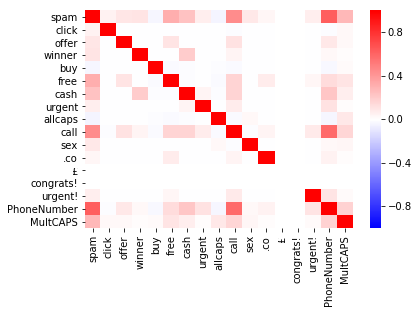

In [59]:
sns.heatmap(sms_raw.corr(), cmap='bwr', center=0, vmin=-1, vmax=1)
plt.show()

A couple of things immediately jump out from this correlation heatmap.

1. "£" and "congrats!" have no correlation - not even to themselves
    - These need to be investigated and fixed
2. "PhoneNumber" has the strongest correlation to spam messages and a fairly strong one with "call"
    - While the underlying assumption of the Naive Bayes model is that the variables should all be independent, I will keep both variables in the model for now.
3. 'buy', 'allcaps', and '.co' all have extremely low correlations to spam
    - I will remove 'buy' and 'allcaps' from the model
    - I think the implementation of '.co' is currently incorrect so I will attempt to fix it and keep the feature in the model

In [68]:
sms_raw.head()

,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps,call,sex,.co,£,congrats!,urgent!,PhoneNumber,MultCAPS
0,False,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,True,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,"Nah I don't think he goes to usf, he lives around here though",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [69]:
# Creating a new DataFrame for this model
sms_model5 = sms_raw.iloc[:, [0,1,2,4,6,7,8,10,11,16,17]]

# Removing the padding spaces from these keywords
sms_model5['.co'] = sms_raw['message'].str.contains('.co', case=False)
sms_model5['£'] = sms_raw['message'].str.contains('£')
sms_model5['congrats!'] = sms_raw['message'].str.contains('congrats!', case=False)
sms_model5['urgent!'] = sms_raw['message'].str.contains('urgent!', case=False)

/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [70]:
sms_model5.head()

,spam,message,click,winner,free,cash,urgent,call,sex,PhoneNumber,MultCAPS,.co,£,congrats!,urgent!
0,False,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,True,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,False,False,False,False,False,False,False,True,True,True,False,False,False
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives around here though",False,False,False,False,False,False,False,False,True,False,False,False,False


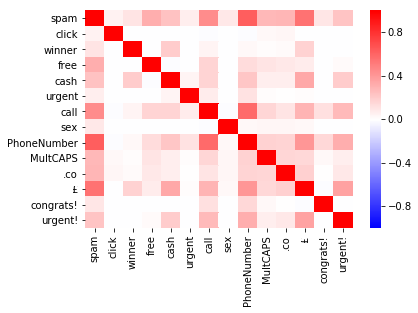

In [71]:
sns.heatmap(sms_model5.corr(), center=0, vmin=-1, vmax=1, cmap='bwr')
plt.show()

All the problem variables have been fixed now. And we see much stronger correlations to the spam messages.  One downside to these new features is that there are more dependent relations between variables. We'll spin up a new NB model for this dataset now.

In [72]:
# Instantiating Model 5
bnb_5 = BernoulliNB()

data_5 = sms_model5.iloc[:, 2:]
target_5 = sms_model5['spam']

bnb_5.fit(data_5, target_5)
y_pred_5 = bnb_5.predict(data_5)

print('Model 5:\n', confusion_matrix(target_5, y_pred_5), '\n')
print('Model 5 precision: {} \nModel 5 recall: {}'.format(
    precision(y_pred_5, target_5)[0], precision(y_pred_5, target_5)[1]))

Model 5:
 [[4782   43]
 [ 249  498]] 

Model 5 precision: 0.9205175600739371 
Model 5 recall: 0.6666666666666666


In [74]:
cross_val_score(bnb_5, data_5, y_pred_5, cv=10)

array([0.98747764, 0.99640934, 0.98922801, 0.99640934, 0.98743268,
       0.98922801, 0.99820467, 0.99281867, 0.99102334, 0.994614  ])

# Comparing all the model results

In [73]:
print('Model 1:\n', confusion_matrix(target, y_pred), '\n')
print('Model 2:\n', confusion_matrix(target_2, y_pred_2), '\n')
print('Model 3:\n', confusion_matrix(target_3, y_pred_3), '\n')
print('Model 4:\n', confusion_matrix(target_4, y_pred_4), '\n')
print('Model 5:\n', confusion_matrix(target_5, y_pred_5), '\n')


Model 1:
 [[4770   55]
 [ 549  198]] 

Model 2:
 [[4595  230]
 [ 328  419]] 

Model 3:
 [[4810   15]
 [ 385  362]] 

Model 4:
 [[4655  170]
 [ 281  466]] 

Model 5:
 [[4782   43]
 [ 249  498]] 



Model 5 caught the most spam and sent the second least number of real messages to the spam box. Based on a 10 fold cross validation, the model is not overfit to the data.  All in all, its a fairly robust model.